In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# built in seabon dataset
tips = pd.read_csv("tips.csv")

In [3]:
#titanic
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### Distribution 

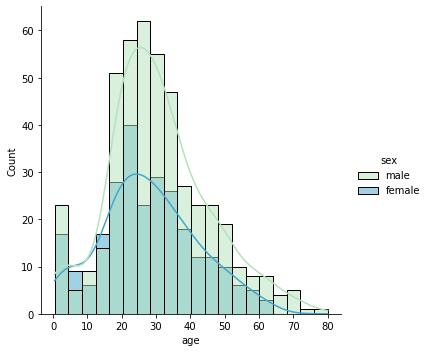

In [6]:
sns.displot(df,x = "age",hue = "sex" ,palette= "GnBu", kde = True)

<AxesSubplot:xlabel='age', ylabel='Count'>

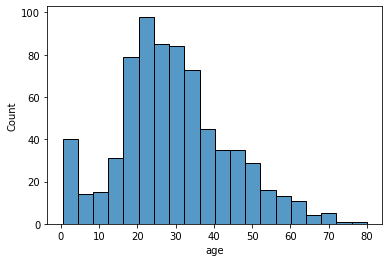

In [7]:
sns.histplot(df["age"])

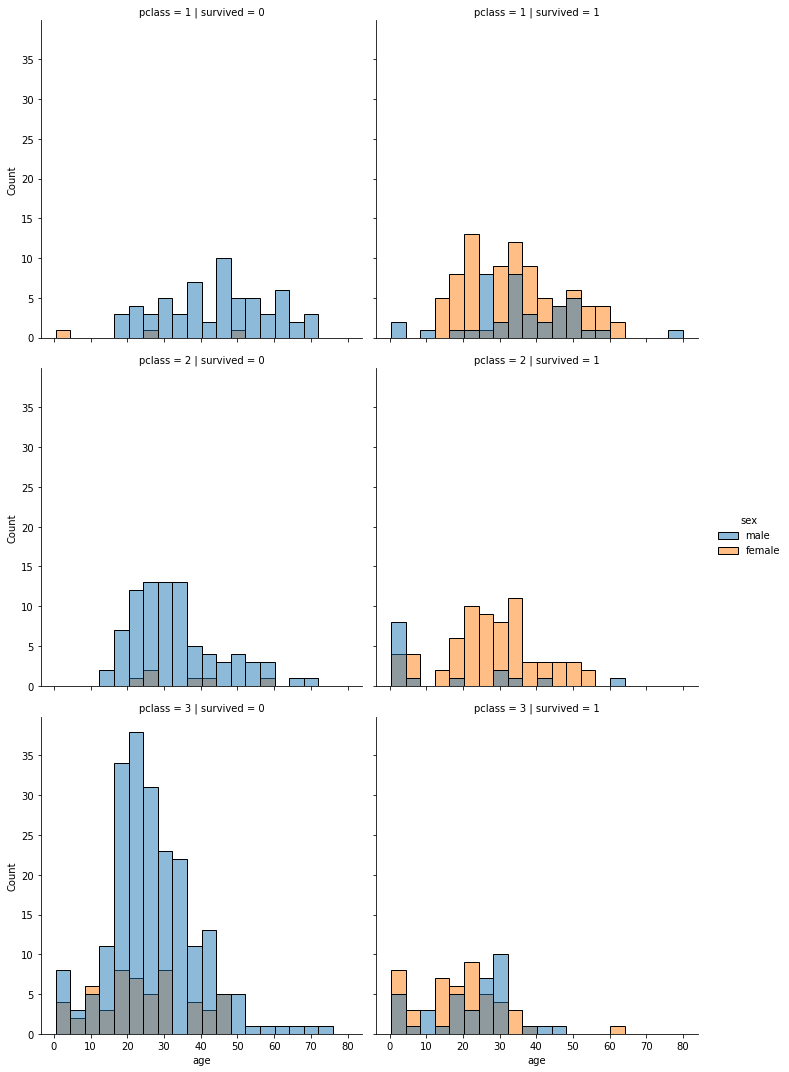

In [8]:
sns.displot(df,x = "age", col = "survived", row="pclass", hue = "sex")

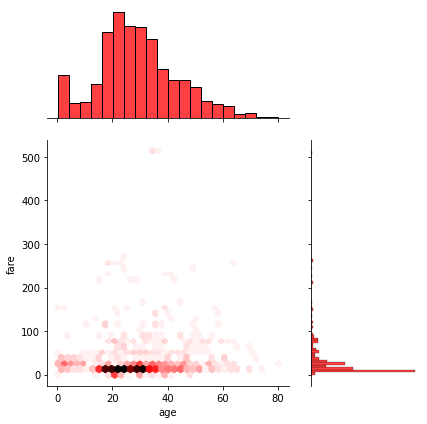

In [9]:
sns.jointplot( x = "age", y = "fare" ,data = df,color="r",height = 6 , ratio = 2, kind = "hex")

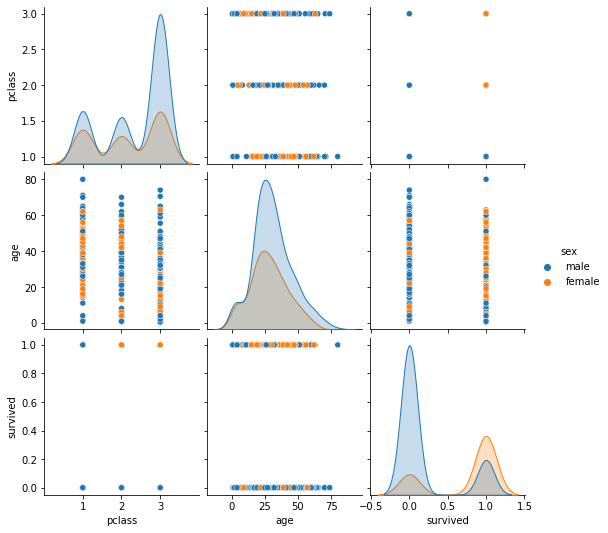

In [10]:
sns.pairplot(data = df[["sex", "pclass", "age","survived"]], hue="sex")
plt.show()

## Categorical

<AxesSubplot:title={'center':'Count'}, xlabel='sex', ylabel='count'>

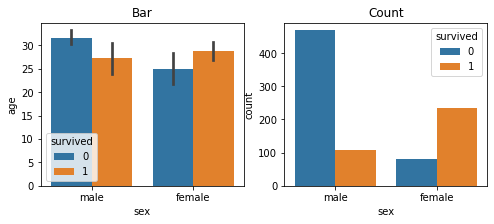

In [11]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.title("Bar")
sns.barplot(data = df, x = "sex", y= "age", hue = "survived")

plt.subplot(1,2,2)
plt.title("Count")
sns.countplot(data = df, x = "sex", hue = "survived")

<AxesSubplot:xlabel='sex', ylabel='count'>

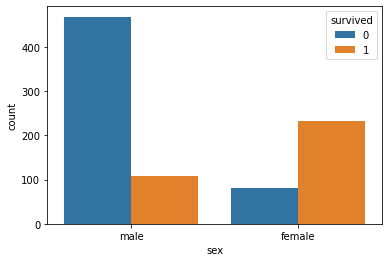

In [12]:
sns.countplot(data = df, x = "sex", hue= "survived")

<AxesSubplot:xlabel='sex', ylabel='age'>

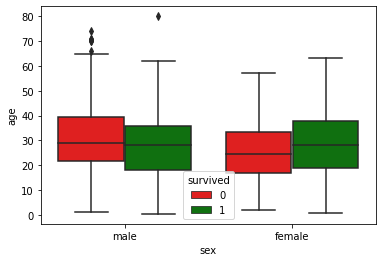

In [13]:
pallette = {0:"r", 1:"g"}
sns.boxplot(x = "sex", y="age", data=df, hue ="survived", palette = pallette)

<AxesSubplot:xlabel='sex', ylabel='age'>

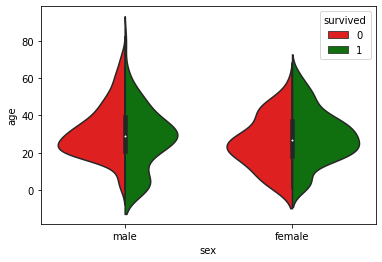

In [14]:
sns.violinplot(data = df , x = "sex", y = "age", hue = "survived", split =True, palette=pallette)

In [15]:
# if you are male:  younger or older than +-20 years then you have a higher chance of surviving 
# if you are female: the older your are the higher chance of dying

<AxesSubplot:xlabel='sex', ylabel='age'>

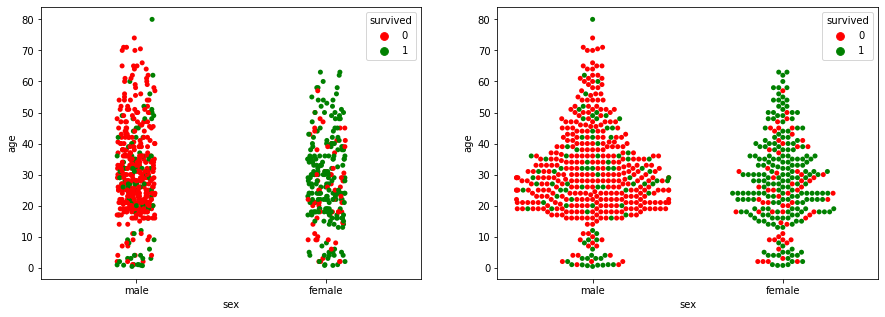

In [16]:
plt.figure (figsize=(15,5))
plt.subplot(1,2,1)
sns.stripplot(data = df , x = "sex", y = "age", hue = "survived", jitter =True, palette=pallette)

plt.subplot(1,2,2)
sns.swarmplot(data = df , x = "sex", y = "age", hue = "survived", palette=pallette)

## Matrix plots 
for matrix plots you need to have your DF in a matrix (i.e. rows have labels and columns have labels)

In [17]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

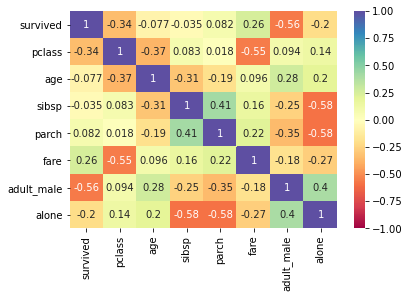

In [18]:
sns.heatmap(data = df.corr(),annot=True , vmin=-1, vmax=1, cmap="Spectral")

In [19]:
## if you need a matrix use df.pivot_table 
df2 = df.pivot_table(index = "pclass", columns="sex", values = "fare")

In [20]:
df2

sex,female,male
pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


<AxesSubplot:xlabel='sex', ylabel='pclass'>

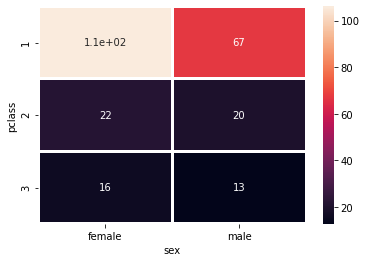

In [21]:
sns.heatmap(df2, linecolor= "white", linewidths= 2, annot= True)

In [22]:
df3 = df.pivot_table(index = "sex", columns= "pclass", values = "fare")

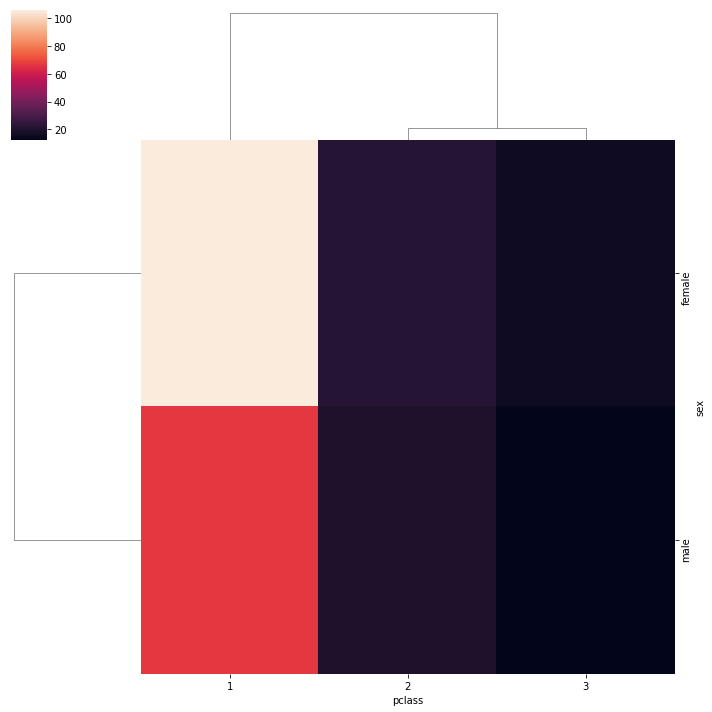

In [23]:
#cluster map tries to group similar rows and columns together
sns.clustermap(df3)

## FacetGrid

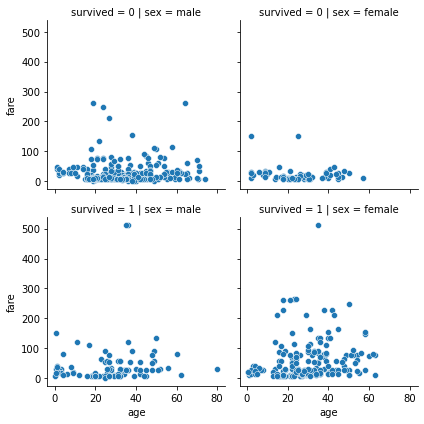

In [24]:
grid = sns.FacetGrid (df, col ="sex" , row = "survived")
grid.map(sns.scatterplot, "age","fare" )

## lineplot  

<AxesSubplot:xlabel='age', ylabel='fare'>

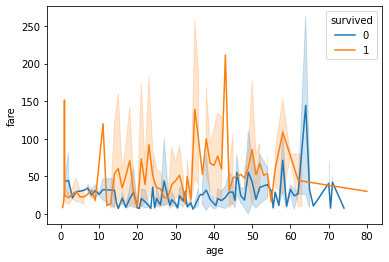

In [25]:
sns.lineplot(data = df, x="age", y = "fare" ,hue = "survived")

## Linear Regresion 

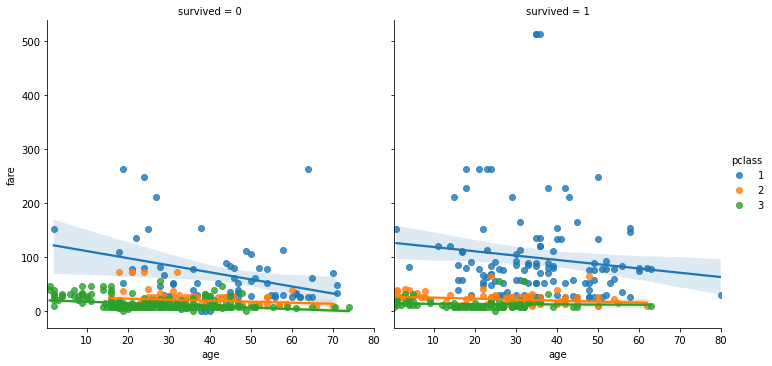

In [26]:
sns.lmplot(data = df, x="age", y = "fare" ,col = "survived", hue ="pclass")

In [27]:
### what ive learned 

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


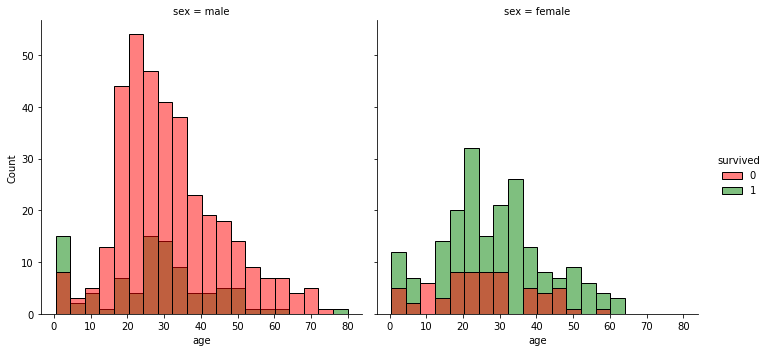

In [29]:
sns.displot(data = df, x = "age", col = "sex", hue = "survived", palette={0:"r",1:"g"})

In [30]:
## lower ages in male (0-5years) increases your chance of surviving 
##3 females - 32 -37 all survived??
# females around age 10 all died?